In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ImportError: cannot import name 'adjusted_r2_score' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

In [25]:
f_data = pd.read_csv("spd.csv")
f_data

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


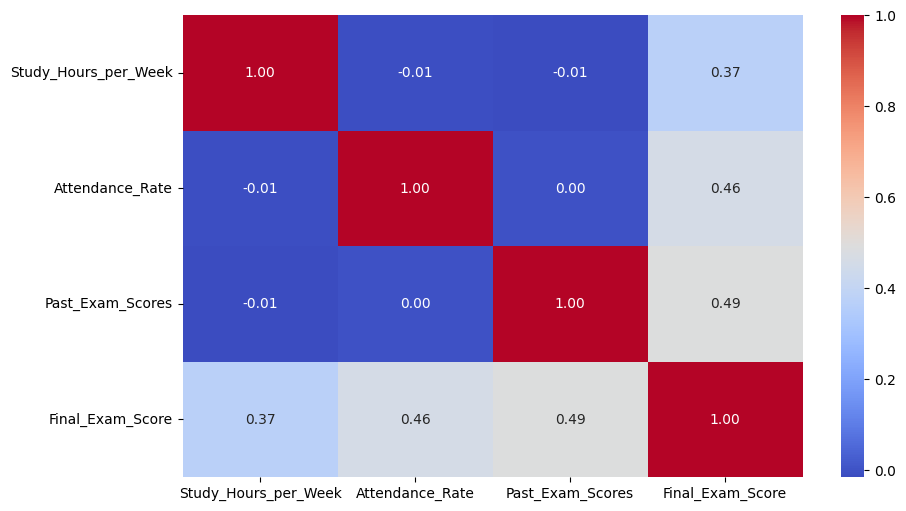

In [26]:
numeric_values = f_data.select_dtypes(include=['int64','float64'])
corr_metrix = numeric_values.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_metrix, cmap="coolwarm", fmt=".2f", annot=True)
plt.show()

In [27]:
f_data.drop(['Student_ID','Parental_Education_Level','Pass_Fail','Extracurricular_Activities','Internet_Access_at_Home', 'Gender'], axis= 1, inplace=True)

In [28]:
f_data

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
0,31,68.267841,86,63
1,16,78.222927,73,50
2,21,87.525096,74,55
3,27,92.076483,99,65
4,37,98.655517,63,70
...,...,...,...,...
703,14,84.658761,78,50
704,35,60.278990,83,62
705,25,98.384969,75,57
706,21,96.148012,84,65


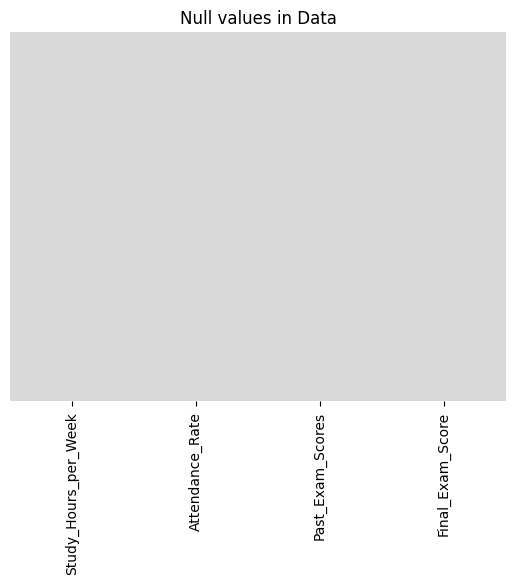

In [29]:
sns.heatmap(f_data.isnull(), yticklabels=False, cbar=False, cmap="tab20c_r")
plt.title("Null values in Data")
plt.show()

In [30]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study_Hours_per_Week  708 non-null    int64  
 1   Attendance_Rate       708 non-null    float64
 2   Past_Exam_Scores      708 non-null    int64  
 3   Final_Exam_Score      708 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.3 KB


In [31]:
x = f_data.drop('Final_Exam_Score', axis= 1)
y = f_data['Final_Exam_Score']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=1)

In [32]:
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [33]:
y_predict = lin.predict(x_test)
y_predict

array([54.67985373, 56.58256403, 57.24207157, 66.09601531, 56.06339602,
       62.40759515, 56.57517448, 58.06440064, 53.46146944, 48.42952921,
       58.83359014, 58.079026  , 56.64207694, 61.86975383, 65.34840002,
       48.69355204, 64.40192065, 45.7103699 , 61.33922284, 52.12483457,
       62.41453911, 67.27785046, 57.09819163, 54.48010751, 53.40349851,
       58.89132564, 65.09197613, 57.81889248, 57.75312315, 58.22871742,
       65.16262661, 57.68145153, 45.57482445, 58.36222187, 47.34730535,
       60.63781064, 61.62373559, 62.51549257, 56.80265819, 60.4285199 ,
       63.11112098, 65.81697347, 58.52558767, 62.64945986, 54.95027625,
       47.90863221, 60.65156922, 63.72759944, 63.9368048 , 65.25071847,
       58.03409796, 68.70511303, 46.73316919, 51.68412041, 68.56998114,
       49.83730274, 59.09938221, 58.76163735, 48.13164251, 66.26058663,
       62.51549257, 56.90393758, 58.76277394, 51.11648004, 56.57517448,
       58.52558767, 51.40567991, 49.55176168, 66.61437197, 66.09

In [44]:
print('--'*30)
print("Mean Square Error")
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

# Number of samples (rows)
n = x_test.shape[0]

# Number of features (columns)
k = x_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Mean Absoulute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Root Squared Error (RMSE)", rmse)
print("R2 Square", r2)
print("Adjusted R2 Square", adjusted_r2)


------------------------------------------------------------
Mean Square Error
Mean Absoulute Error (MAE): 3.54296828408977
Mean Squared Error (MSE): 19.57544246024706
Mean Root Squared Error (RMSE) 4.424414363534123
R2 Square 0.5639853394837602
Adjusted R2 Square 0.5602480709650496


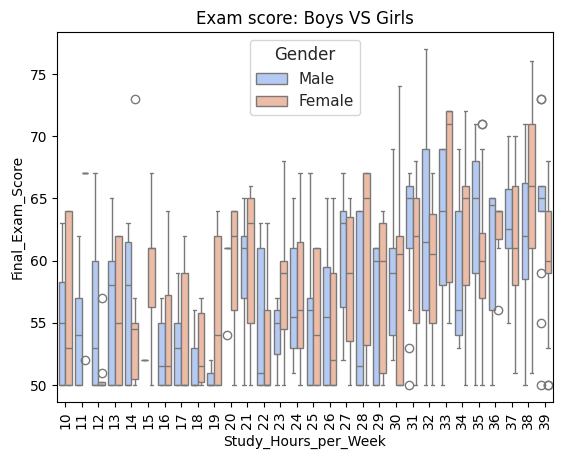

In [35]:
data= pd.read_csv('spd.csv')

plt.title("Exam score: Boys VS Girls")
sns.set(style='whitegrid')
sns.boxplot(data=data, x='Study_Hours_per_Week', y='Final_Exam_Score', hue='Gender', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()